

```
Agar X aur y alag-alag dimensions mein hain, toh unhe same dimension mein laane ke liye, aapko kuch steps follow karne padenge, jise reshape ya flatten ke through aap kar sakte hain. Yeh step usually tab hota hai jab:

X 2D array hai (jisme multiple features hain), aur y 1D array hai (target variable).
X ko ek single column mein convert karna hai, jise regression model ko train karne ke liye 2D format chahiye hota hai.
Common Cases aur Unka Solution:
1. Agar X ko 2D se 1D mein convert karna ho:
Jab aapko feature ko 2D array mein convert karna ho (X ko), toh aapko reshape(-1, 1) ka use karna hoga, jisse ki data column vector mein convert ho jaye.

python
Copy code
X = X.reshape(-1, 1)  # X ko 2D array mein convert karna
2. Agar y ko 2D se 1D mein convert karna ho:
Jab y ek 2D array ho aur aapko ise 1D array mein laana ho, toh aap flatten() ka use kar sakte hain.

python
Copy code
y = y.flatten()  # 2D array ko 1D mein convert karna
Ya agar y 2D array ke form mein ho ((n_samples, 1)), toh aap ravel() bhi use kar sakte hain.

python
Copy code
y = y.ravel()  # 2D ko 1D mein convert karna
```



# **DATA FILTERING AND PROCESSING **

In [1]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = '/content/drive/MyDrive/german_credit_data.csva.csv'

# Check if dataset exists and load, else print a message
if os.path.exists(file_path):
    df_german_credit = pd.read_csv(file_path)
    print("German Credit Data loaded from Google Drive.")
else:
    print("German Credit Data not found. Please import the dataset and save it as shown.")


Mounted at /content/drive
German Credit Data not found. Please import the dataset and save it as shown.


In [93]:
df= pd.read_csv('/content/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [94]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [95]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [96]:
df.shape

(1000, 10)

In [97]:
df=pd.DataFrame(df)

In [98]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [99]:
# Syntax to drop NaN values from a specific column in a DataFrame
df = df.dropna(subset=['Saving accounts'])


In [100]:
# Syntax to drop NaN values from a specific column in a DataFrame
df = df.dropna(subset=['Checking account'])


In [101]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [102]:
df= pd.get_dummies(df, columns=['Sex', 'Housing', 'Saving accounts','Checking account', 'Purpose' ])

In [103]:
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,1,22,2,5951,48,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,3,45,2,7882,42,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
7,7,35,3,6948,36,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,False
9,9,28,3,5234,30,False,True,False,True,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,1,1743,24,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
993,993,30,3,3959,36,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
996,996,40,3,3857,30,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
998,998,23,2,1845,45,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


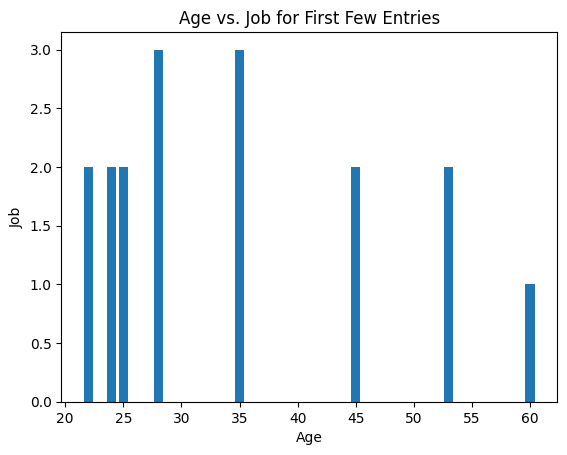

In [104]:
df_subset = df.head(10)  # Select the first 5 rows
import matplotlib.pyplot as plt
# Plot the bar chart using the subset
plt.bar(df_subset['Age'], df_subset['Job'])
plt.xlabel('Age')
plt.ylabel('Job')
plt.title('Age vs. Job for First Few Entries')
plt.show()

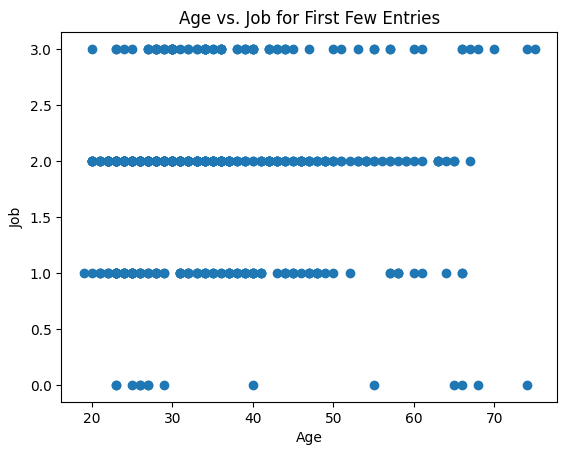

In [105]:
df_subset = df  # Select the first 5 rows

# Plot the bar chart using the subset
plt.scatter(df_subset['Age'], df_subset['Job'])
plt.xlabel('Age')
plt.ylabel('Job')
plt.title('Age vs. Job for First Few Entries')
plt.show()

<Axes: >

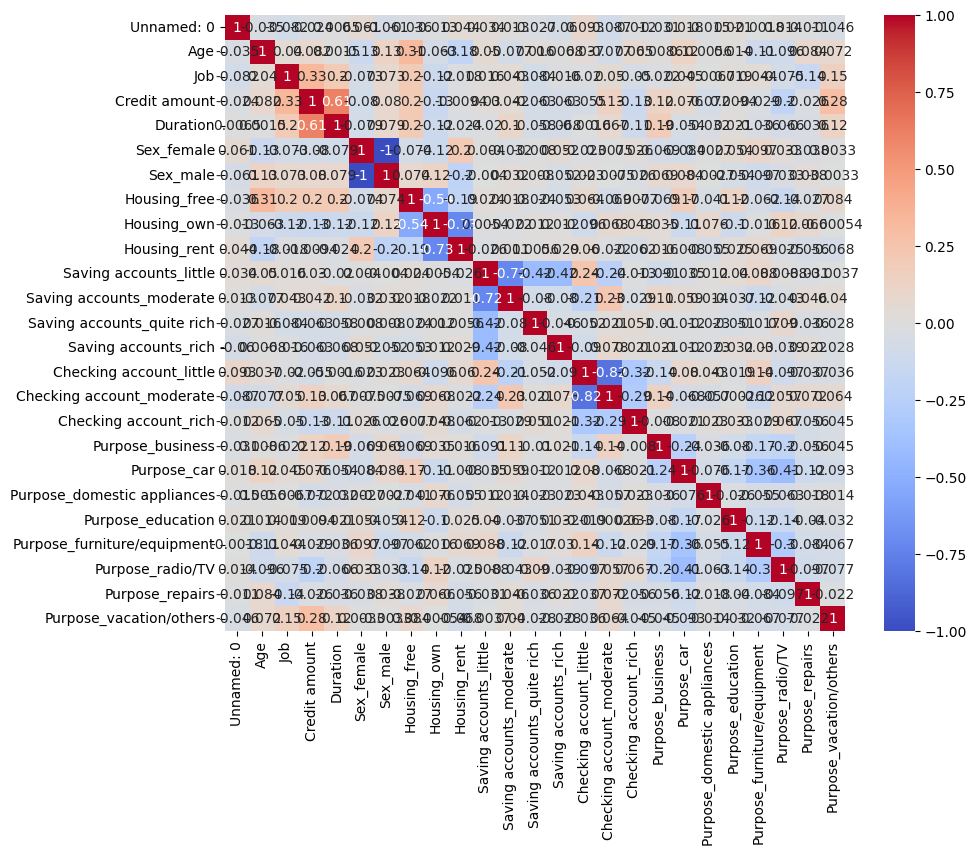

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

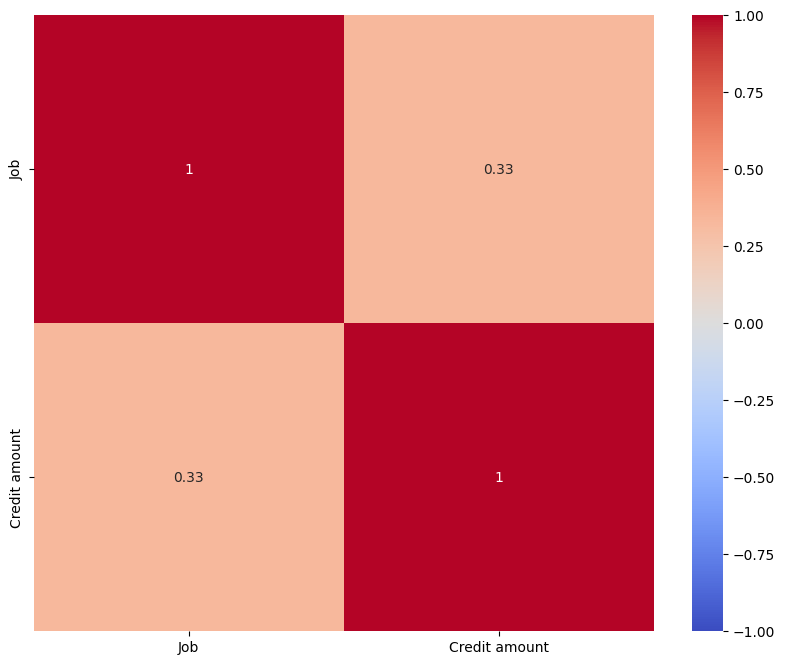

In [107]:
corr_df= df[['Job', 'Credit amount']].corr()
plt.figure(figsize= (10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# **LINEAR REGRESSION**

In [108]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import logisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [109]:
X = df.drop('Credit amount', axis=1)
y= df['Credit amount']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,  random_state=24 )
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test, y_train)

     Unnamed: 0  Age  Job  Duration  Sex_female  Sex_male  Housing_free  \
714         714   27    3        60       False      True         False   
961         961   47    2        21       False      True         False   
47           47   23    0         6        True     False         False   
143         143   22    2        18       False      True         False   
958         958   45    1        28       False      True         False   
..          ...  ...  ...       ...         ...       ...           ...   
684         684   31    1        36       False      True         False   
186         186   74    3         9        True     False          True   
145         145   30    2        48       False      True         False   
809         809   26    0        15        True     False         False   
207         207   26    2        12       False      True         False   

     Housing_own  Housing_rent  Saving accounts_little  ...  \
714         True         False      

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform, not fit_transform
X_test,y_test

(array([[ 0.79086934, -0.69535037,  1.66889117, ..., -0.55796125,
         -0.15674828, -0.14852213],
        [ 1.66379443,  1.00580014,  0.19133784, ..., -0.55796125,
         -0.15674828, -0.14852213],
        [-1.56638182, -1.03558047, -2.76376882, ..., -0.55796125,
         -0.15674828, -0.14852213],
        ...,
        [-1.22003907, -0.44017779,  0.19133784, ..., -0.55796125,
         -0.15674828, -0.14852213],
        [ 1.12660976, -0.7804079 , -2.76376882, ..., -0.55796125,
         -0.15674828, -0.14852213],
        [-1.00092427, -0.7804079 ,  0.19133784, ..., -0.55796125,
         -0.15674828, -0.14852213]]),
 714    14027
 961     2353
 47      1352
 143     2462
 958     4006
        ...  
 684     9857
 186     5129
 145     3566
 809     1778
 207     1424
 Name: Credit amount, Length: 105, dtype: int64)

In [112]:
# Convert categorical variables in X_train to numeric using one-hot encoding
df = pd.get_dummies(df)

In [113]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)


R² score (R-squared score), jise coefficient of determination bhi kaha jata hai, ek statistical measure hai jo model ki goodness of fit ko measure karta hai. Iska matlab hai ki model kitna achha actual data ko explain karta hai.


```
R² = 1: Agar R² score 1 hai, iska matlab hai ki model ne perfect fit kiya hai. Matlab, model ne actual data ka 100% variance explain kar liya hai.
R² = 0: Agar R² score 0 hai, iska matlab hai ki model kuch bhi predict nahi kar raha hai aur data ka koi bhi pattern capture nahi kar raha.
R² < 0: Agar R² score negative ho, iska matlab hai ki model jo predictions de raha hai, wo actual data se bhi bekar hain. Iska matlab hai ki aapka model badly overfit ya underfit ho sakta hai.
```



In [114]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
r2

0.4712891393914198

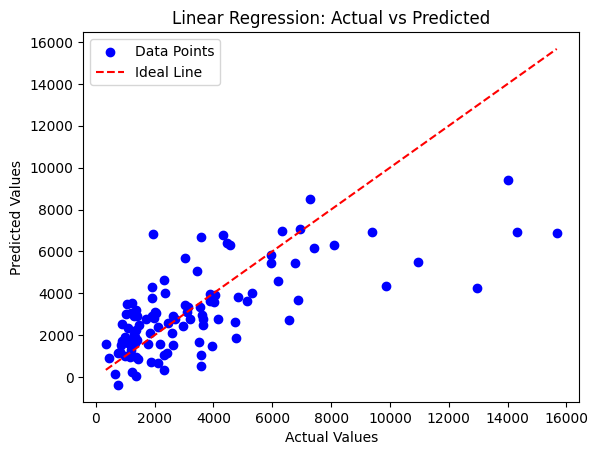

In [115]:
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [116]:
from sklearn.metrics import mean_absolute_error

mean_absolute_err = mean_absolute_error(y_test, y_pred)
print(f"mean_absolute_error: {mean_absolute_err}")

mean_absolute_error: 1505.497734779624


In [117]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.4712891393914198


# **Ridge aur Lasso Model **

Cross-Validation with cross_val_score

Purpose: Cross-validation is a technique used to evaluate a model’s performance in a more robust way by training and testing it on multiple data splits. This reduces the risk of overfitting and underfitting.

How it Works:

The dataset is divided into multiple subsets called "folds" (e.g., cv=5 for 5 folds).
The model is trained on k-1 folds and tested on the remaining fold. This process repeats k times.
The scores from each fold are averaged to give an overall performance measure.
Parameters in cross_val_score:

model: The machine learning model to evaluate.
X & y: Feature matrix and target vector.
cv: Number of folds (e.g., 5 or 10).
scoring: Metric for evaluating performance (e.g., 'accuracy', 'neg_mean_squared_error').
Benefits:

Provides a reliable performance measure by averaging scores across folds.
Reduces overfitting risk by testing on multiple data subsets.
Helps with model selection and hyperparameter tuning.

In [118]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score


In [119]:
ridge_model = Ridge(alpha= 1.0)
ridge_score= cross_val_score(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error' )


In [120]:
lasso_model= Lasso(alpha= 0.1)
lasso_score= cross_val_score(lasso_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+07, tolerance: 3.194e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+07, tolerance: 3.253e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.484e+06, tolerance: 2.919e

In [121]:
print("Ridge Model Scores:", ridge_score)
print('-'*60)
print("Lasso Model Scores:", lasso_score)
print('='*60)
print("Ridge Model Scores minimum :", ridge_score.min())
print('-'*60)
print("Lasso Model Scores:", lasso_score.min())
print('='*60)


Ridge Model Scores: [-5192397.13936461 -2666166.81690627 -6835753.06060088 -2699126.54249142
 -4560919.48545947 -4543770.93242389 -6532185.69255488 -5008347.30855127
 -5506493.96046764 -4803662.33728448]
------------------------------------------------------------
Lasso Model Scores: [-5198559.91135199 -2668354.41492757 -6830097.88395244 -2705017.80291085
 -4573259.02305497 -4544368.94885351 -6536691.08604658 -5003709.77574871
 -5503397.38577834 -4806903.49596242]
Ridge Model Scores minimum : -6835753.060600879
------------------------------------------------------------
Lasso Model Scores: -6830097.883952437


In [122]:
rs= pd.DataFrame(ridge_score, columns=['Ridge Scores'])
ls= pd.DataFrame(lasso_score, columns=['Lasso Scores'])

d= pd.DataFrame({
    'Ridge' : rs['Ridge Scores'].describe(),
    'Lasso' : ls['Lasso Scores'].describe()
})
d

,Ridge,Lasso
count,1.000000e+01,1.000000e+01
mean,-4.834882e+06,-4.837036e+06
std,1.371084e+06,1.369041e+06
min,-6.835753e+06,-6.830098e+06
25%,-5.427970e+06,-5.427188e+06
50%,-4.906005e+06,-4.905307e+06
75%,-4.548058e+06,-4.551591e+06
max,-2.666167e+06,-2.668354e+06


## **Result Analysis**

Yeh Ridge aur Lasso model scores show kar rahe hain ki 10-fold cross-validation ke dauran negative mean squared error (MSE) kitna aya. Lower (or more negative) MSE ka matlab hai ki model ka performance poor hai on that fold, aur less negative MSE better performance indicate karta hai.

```

Scores Interpretation:

Dono models (Ridge aur Lasso) ke scores negative hain kyunki humne neg_mean_squared_error use kiya hai. Agar scores positive hotay to error lower hota aur model better fit hota.
Yahan Ridge aur Lasso models ke scores me kuch difference hai, lekin woh bahut zyada nahi hai, jo yeh indicate karta hai ki dono models ka performance similar hai.
Model Comparison:

Ridge: Ridge model ke kuch folds me MSE slightly lower hai, especially on certain folds, jaise ki -2660292.55379053, -2700450.50118218.
Lasso: Lasso model ke scores thode high (more negative) hain kuch folds me, jaise ki -5206805.45701311 aur -4915640.02025869.
Conclusion:

Ridge aur Lasso models me se, Ridge ka slightly better performance hai in terms of MSE for this data.
Model tuning ki zaroorat ho sakti hai, jaise ki alpha parameter ka optimization, taki in models ka performance aur enhance ho sake.
```



**Hyperparameter Tuning (Ridge aur Lasso ka)**



```
Option 1: Hyperparameter Tuning (Ridge aur Lasso ka)
Agar aap regularization-based model (Ridge ya Lasso) ke saath hi continue karna chahte hain aur uska performance improve karna chahte hain, to Hyperparameter Tuning ek effective option hai.

Fayde
Error ko Reduce: alpha ki best value tune karke aap model ka performance significantly improve kar sakte hain.
Overfitting ko Control: Higher values of alpha regularization ko increase karenge, jo overfitting reduce karega.
```



In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
# Ridge
param_grid= {'alpha': [0.01, 0.1, 1,4.2,4.3,4.5,5, 10, 100 , 1000],
            'max_iter': [1000, 10000, 100000],}
ridge_model= Ridge()
ridge_grid= GridSearchCV(estimator= ridge_model, param_grid=param_grid, scoring= 'neg_mean_squared_error', cv=10)
ridge_grid.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)

Best Ridge alpha: {'alpha': 100, 'max_iter': 1000}
Best Ridge Score: -4815688.740529819


In [126]:
# Lasso
lasso_model = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
lasso_grid.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso Score:", lasso_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+07, tolerance: 3.194e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+07, tolerance: 3.253e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+07, tolerance: 2.919e

Best Lasso alpha: {'alpha': 100, 'max_iter': 1000}
Best Lasso Score: -4662099.329656167


Cross-Validation R2 scores:  [0.35901876 0.38649824 0.3201813  0.55639179 0.46792467]
Average R2 Score: 0.4180029507755121
Cross-validation results (Negative MAE): [0.35901876 0.38649824 0.3201813  0.55639179 0.46792467]
Mean Negative MAE: 0.4180029507755121
Standard Deviation of MAE: 0.08448006537386407


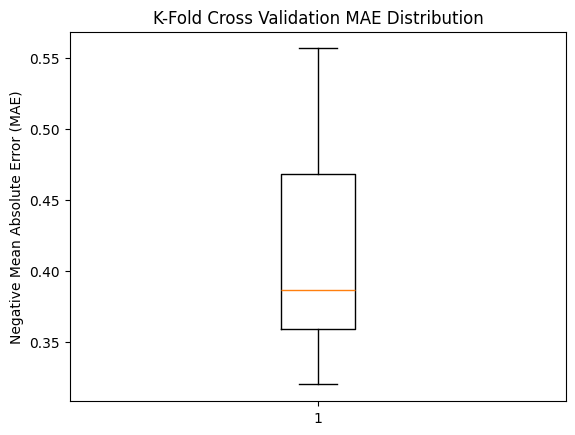

In [127]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 scores: ", scores)
print("Average R2 Score:", scores.mean())

# Print out the results of each fold
print("Cross-validation results (Negative MAE):", scores)
print(f"Mean Negative MAE: {scores.mean()}")
print(f"Standard Deviation of MAE: {scores.std()}")


# If you want to plot the results
import matplotlib.pyplot as plt
plt.boxplot(scores)
plt.title('K-Fold Cross Validation MAE Distribution')
plt.ylabel('Negative Mean Absolute Error (MAE)')
plt.show()

REPEATED KFOLD CROSS-VALIDATION



```
Agar aap Repeated K-Fold Cross Validation ka use karna chahte hain toh aap RepeatedKFold ka
use kar sakte hain jo K-Fold Cross Validation ko multiple times repeat karta hai. Isse model
 ki performance ko zyada robust tarike se evaluate kiya ja sakta hai.

Steps to Use RepeatedKFold:
RepeatedKFold:

RepeatedKFold se hum model ko multiple times (repeats) train
 karte hain aur har baar K subsets mein data ko
divide karte hain.
Cross Validation:

cross_val_score ka use karke hum model ko repeated k-fold
cross-validation ke through evaluate karte hain.
```



Cross-Validation R2 scores:  [-1505.51315994 -1426.64749907 -1471.69696531 -1607.32462711
 -1669.3314874  -1656.87246431 -1492.54384822 -1598.40309188
 -1383.97617957 -1490.48798313 -1484.21063328 -1512.1951756
 -1475.29272413 -1607.99365766 -1524.25170718]
Average R2 Score: -1527.1160802522047
Cross-validation results (Negative MAE): [-1505.51315994 -1426.64749907 -1471.69696531 -1607.32462711
 -1669.3314874  -1656.87246431 -1492.54384822 -1598.40309188
 -1383.97617957 -1490.48798313 -1484.21063328 -1512.1951756
 -1475.29272413 -1607.99365766 -1524.25170718]
Mean Negative MAE: -1527.1160802522047
Standard Deviation of MAE: 80.2219988917413


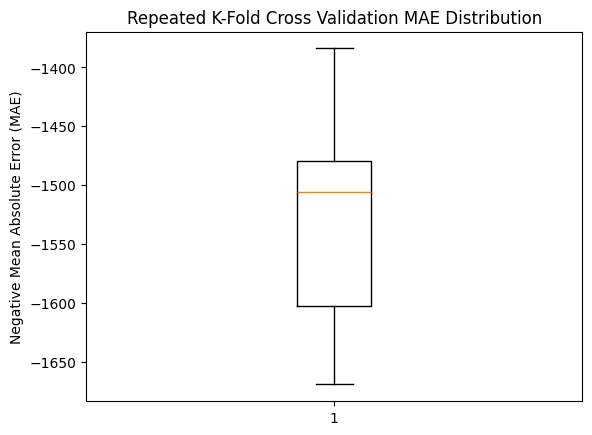

In [128]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
model= LinearRegression()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['Credit amount']
# setting up repeated k-fold cross validation
#5-split (k=5), repeated 3 times

rkf= RepeatedKFold(n_splits =5, n_repeats=3, random_state=24)

#perform repeated k-fold cross validation
cv_result= cross_val_score(model,X, y, cv= rkf, scoring='neg_mean_absolute_error')
print("Cross-Validation R2 scores: ", cv_result)
print("Average R2 Score:", cv_result.mean())

# Print out the results of each fold
print("Cross-validation results (Negative MAE):", cv_result)
print(f"Mean Negative MAE: {cv_result.mean()}")
print(f"Standard Deviation of MAE: {cv_result.std()}")


# If you want to plot the results
import matplotlib.pyplot as plt
plt.boxplot(cv_result)
plt.title('Repeated K-Fold Cross Validation MAE Distribution')
plt.ylabel('Negative Mean Absolute Error (MAE)')
plt.show()

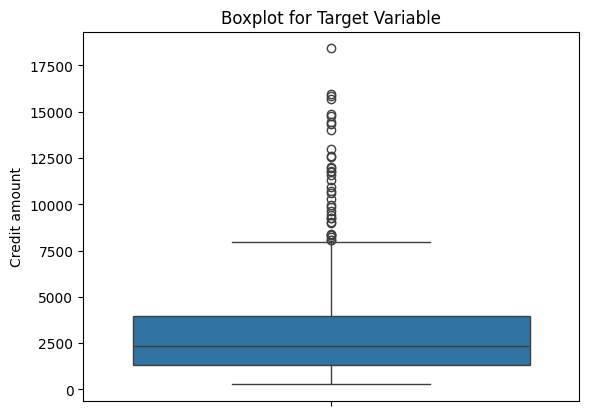

In [129]:
import seaborn as sns
sns.boxplot(y)
plt.title("Boxplot for Target Variable")
plt.show()

# **ELASTICNET REGULATION**

In [130]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np



```
Key Parameters in ElasticNet:
alpha: Regularization strength (default = 1.0).
Higher values increase regularization.
l1_ratio: Balance between L1 (Lasso) and L2 (Ridge) regularization.
l1_ratio=0.5 means equal contribution of both Lasso and Ridge.
Closer to 1 gives more sparsity like Lasso, and closer to 0 behaves like Ridge.
```



In [131]:
#Spltting X and y (ensuring y is not scaled)
X=df.drop('Credit amount', axis=1)
y= df['Credit amount']

#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y , train_size= 0.8, random_state=42 )

# Scaling only features (X)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# ElasticNet model with tuned alpha and l1_ratio
elastic_net_model= ElasticNet(alpha= 1.0, l1_ratio= 0.5, random_state= 42)
elastic_net_model.fit(X_train_scaled, y_train)

#prediction
y_pred= elastic_net_model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 1567.747225949928
R2 Score: 0.4665778258836146


APPLYING GRIDSEARCHCV IN THE ELASTIC MODEL


In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 10],
    'l1_ratio': [0.2, 0.5, 0.8, 1.0]
}

grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+07, tolerance: 2.834e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.683e+06, tolerance: 2.578e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+07, tolerance: 2.778e

Best Parameters: {'alpha': 10, 'l1_ratio': 1.0}
Best R2 Score: 0.4064926315850098


ELASTICNET REGRESSOR WITH PCA

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# Apply PCA
pca= PCA(n_components=0.999)
X_pca= pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca.shape[1]}")


#Spltting X and y (ensuring y is not scaled)
X=df.drop('Credit amount', axis=1)
y= df['Credit amount']

#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_pca,y , train_size= 0.8, random_state=42 )

# Scaling only features (X)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# ElasticNet model with tuned alpha and l1_ratio
elastic_net_model= ElasticNet(alpha= 1.0, l1_ratio= 0.5, random_state= 42)
elastic_net_model.fit(X_train_scaled, y_train)

#prediction
y_pred= elastic_net_model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Original features: 24
Reduced features: 19
Mean Absolute Error: 1589.2845568915354
R2 Score: 0.43985007530191866


# **RANDOMFOREST REGRESSOR**

Mean Absolute Error: 1611.148095238095
R2 Score: 0.36819569589323753


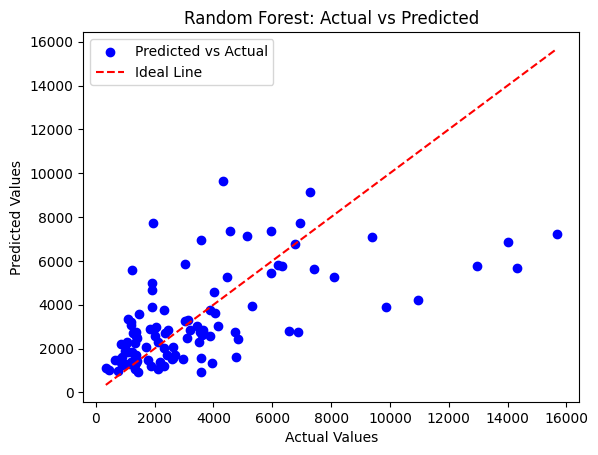

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

#Separate features (X) and the target variable (y):
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

#If your dataset has categorical variables, convert them to numeric:
X = pd.get_dummies(X)

#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

#Set up the Random Forest model and train it:
rf_model= RandomForestRegressor(n_estimators =100, random_state=24)
rf_model.fit(X_train, y_train)

#Predict the target values for the test set
y_pred= rf_model.predict(X_test)

#using the evaluation matrix
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

Applying GridSearchCV

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    'n_estimators': [50, 100, 200],
     'max_depth' : [10,20,30,  None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search= GridSearchCV(estimator=RandomForestRegressor(random_state=24), param_grid= param_grid, scoring= 'roc_auc', cv=5, n_jobs=-1 )
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Applying feature Engineering in the above model

In [136]:
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices[:10]:  # Top 10 features
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")


Duration: 0.4064
Unnamed: 0: 0.1210
Age: 0.1108
Purpose_vacation/others: 0.0903
Job: 0.0823
Checking account_moderate: 0.0215
Housing_own: 0.0205
Purpose_car: 0.0167
Housing_rent: 0.0141
Checking account_little: 0.0131


Applying PCA in Rainforest Regressor

Original features: 24
Reduced features: 19
Mean Absolute Error: 1561.658380952381
R2 Score: 0.4392796528915266


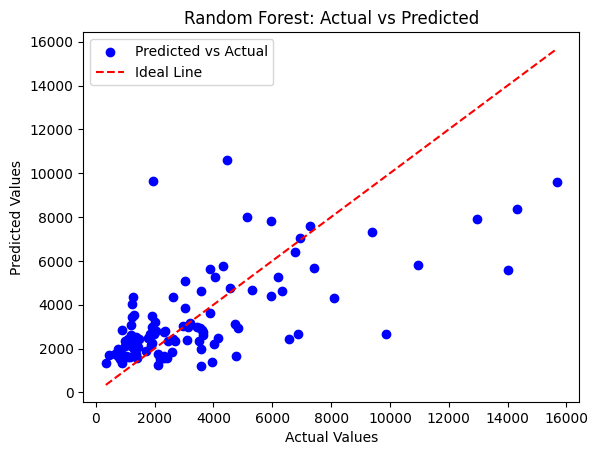

In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# Apply PCA
pca= PCA(n_components=0.999)
X_pca= pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca.shape[1]}")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

#Separate features (X) and the target variable (y):
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

#If your dataset has categorical variables, convert them to numeric:
X = pd.get_dummies(X)

#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=24)

#Set up the Random Forest model and train it:
rf_model= RandomForestRegressor(n_estimators =100, random_state=24)
rf_model.fit(X_train, y_train)

#Predict the target values for the test set
y_pred= rf_model.predict(X_test)

#using the evaluation matrix
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

In [138]:
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,1,22,2,5951,48,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,3,45,2,7882,42,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
7,7,35,3,6948,36,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,False
9,9,28,3,5234,30,False,True,False,True,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,1,1743,24,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
993,993,30,3,3959,36,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
996,996,40,3,3857,30,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
998,998,23,2,1845,45,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


# **RANDOMFOREST CLASSIFIER**

TRYING WUTH RANDOM FOREST CLASSIFIER

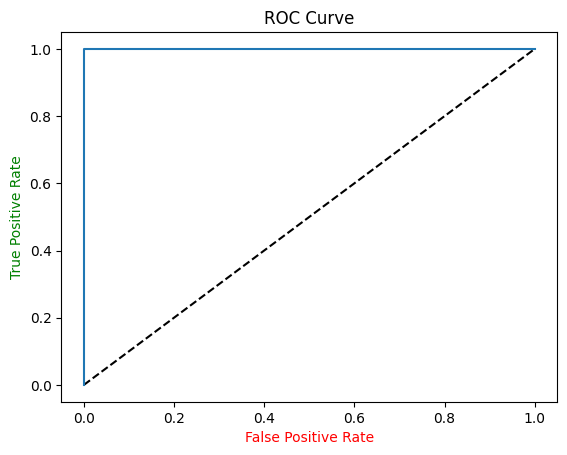

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       140

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv('german_credit_data.csv')

df = pd.get_dummies(data, drop_first=True)
#Define the features, which are used in our ML Model
feature_cols = ['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male',
       'Housing_own', 'Purpose_car', 'Purpose_radio/TV', 'Purpose_education', 'Purpose_vacation/others']

#Sample dataset
# Set X and y variables from the encoded dataframe
X = df.loc[:, feature_cols]
y = df['Housing_own']
#y = pd.cut(y, bins=3, labels=[0, 1, 2])
#Split data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42 )

#create a RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_depth=12, criterion='gini')
rf_classifier.fit(X_train, y_train)



y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, r2_score, make_scorer, mean_absolute_error, roc_curve, auc
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot a ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")

plt.title('ROC Curve')
plt.show()


# #Evalute the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# #Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# For regression evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


# **NAIVE BAYES**



```
Naive Bayes kab use karein?
Textual datasets (e.g., spam, sentiment).
Categorical data.
Multiclass classification.
Simple relationships.
Kab avoid karein?
Strongly correlated features.
Complex or non-linear relationships.
```



In [141]:
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
996,996,40,3,3857,30,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
997,997,38,2,804,12,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
998,998,23,2,1845,45,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [142]:
X= df.drop('Duration', axis=1)
y= df['Credit amount']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 19)
Shape of y: (1000,)


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state=42)



In [144]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [145]:
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

In [146]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %)")
metrics.accuracy_score(y_test, y_pred)

Gaussian Naive Bayes model accuracy(in %)


0.02666666666666667

In [147]:
# # Generate confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# from sklearn.metrics import ConfusionMatrixDisplay

# # Display confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()





```
roc_auc_score is designed for binary classification by default.

For multi-class classification, you must specify how to compute the ROC AUC,
 using either "one-vs-one" (ovo) or "one-vs-rest" (ovr) strategies.
If this is not specified, the function raises the error:
"multi_class must be in ('ovo', 'ovr')".
y_pred contains class predictions instead of probabilities.

The roc_auc_score function expects probabilities or decision function values as
the second parameter (y_score), not discrete class labels.
```



# **GRADIENTBOOSTING CLASSIFIER**

Gradient Boosting Classifier

```
Gradient Boosting Classifier

Effective for structured/tabular data with complex patterns.
Handles imbalanced datasets well.
Provides high accuracy in prediction.
Useful for customer churn prediction, fraud detection, and medical diagnosis.
When to Use

When dealing with small to medium-sized datasets.
When feature importance and interpretability are important.
For complex prediction problems with non-linear relationships.
When Not to Use

On very large datasets or for real-time predictions.
For high-dimensional data like images or text.code
```





```
Gradient Boosting vs Random Forest: While both Random Forest and Gradient Boosting use decision trees, the difference is in how trees are created:

Random Forest: Trees are built independently, and the final prediction is the average (for regression) or majority vote (for classification).
Gradient Boosting: Trees are built sequentially, where each tree corrects the errors of the previous one.
```



In [148]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [149]:
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
996,996,40,3,3857,30,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
997,997,38,2,804,12,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
998,998,23,2,1845,45,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [150]:
X= df.drop('Duration', axis=1)
y= df['Purpose_education']

In [151]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
#create gradient Boosting Classifier with tuned parameters
gb_clf= GradientBoostingClassifier(n_estimators= 200, learning_rate=0.05, max_depth=3, min_samples_split=2 )

In [153]:
# Fit the model
gb_clf.fit(X_train, y_train)

# Predict
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
print("Feature Importances:", gb_clf.feature_importances_)

Accuracy: 1.0
Feature Importances: [2.71197491e-15 8.34053733e-16 1.37210057e-15 2.49215422e-15
 0.00000000e+00 7.92236621e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Preprocess the data
# Load the dataset
df = pd.read_csv('german_credit_data.csv')


# Drop 'Duration' column as mentioned
X = df.drop(['Duration', 'Purpose'], axis=1)
y = df['Purpose']

# Handle categorical variables using LabelEncoder
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = gb_clf.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# User Input Functionality
def predict_user_input():
    print("\nProvide the following details for prediction:")

    user_data = {}
    for col in X.columns:
        if col in label_encoders:
            # Show possible options for categorical columns
            print(f"Options for {col}: {list(label_encoders[col].classes_)}")
            user_input = input(f"Enter value for {col}: ").strip()
            user_data[col] = label_encoders[col].transform([user_input])[0]
        else:
            # For numerical columns
            user_input = float(input(f"Enter value for {col}: "))
            user_data[col] = user_input

    # Convert to DataFrame for scaling and prediction
    user_df = pd.DataFrame([user_data])
    user_scaled = scaler.transform(user_df)

    # Predict using the trained model
    prediction = gb_clf.predict(user_scaled)
    print("\nPredicted Outcome:", prediction[0])

# Allow the user to test the model
predict_user_input()


Accuracy on Test Set: 0.34

Classification Report:
                      precision    recall  f1-score   support

           business       0.25      0.11      0.15        18
                car       0.34      0.49      0.41        63
domestic appliances       0.00      0.00      0.00         1
          education       0.00      0.00      0.00        15
furniture/equipment       0.39      0.20      0.27        44
           radio/TV       0.39      0.48      0.43        54
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.34       200
          macro avg       0.17      0.16      0.16       200
       weighted avg       0.32      0.34      0.32       200


Provide the following details for prediction:
Enter value for Unnamed: 0: 45
Enter value for Age: 25
Options for Sex: ['female', 'male']
Enter value for Sex: male
Enter value for Job: 3
Options for Housing: ['fre

# **XGB CLASSIFIER**

In [177]:
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
996,996,40,3,3857,30,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
997,997,38,2,804,12,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
998,998,23,2,1845,45,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [183]:
#If your dataset has categorical variables, convert them to numeric:
df = pd.get_dummies(df)

feature_cols = ['Age', 'Credit amount', 'Duration', 'Sex_male',
       'Housing_own', 'Purpose_car', 'Purpose_radio/TV', 'Purpose_education', 'Purpose_vacation/others']


#Separate features (X) and the target variable (y):
X = df.loc[:, feature_cols]
y = df['Job']



#Split data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42 )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
#y_train = np.where(y_train > threshold, 1, 0)  # Example: threshold = 0.5
# Create the model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [2 3 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 1 2 2 2 3 2 2 2 2 2 2 2 3
 1 2 2 2 1 2 2 2 1 3 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 2 2
 3 2 2 1 1 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 3 2
 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 3 2 2 2 2 1 1 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 1 2 2 3]


In [184]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)


# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 4. ROC-AUC (only for binary classification)
if len(np.unique(y_test)) == 2:  # Check if binary classification
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Use probabilities for the positive class
    print("ROC-AUC:", roc_auc)

# 5. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.605
Precision: 0.5494791666666667
Recall: 0.605
F1-Score: 0.5602576260470997
Confusion Matrix:
 [[  0   0   4   1]
 [  0  10  37   3]
 [  0  12 106   7]
 [  0   2  13   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.42      0.20      0.27        50
           2       0.66      0.85      0.74       125
           3       0.31      0.25      0.28        20

    accuracy                           0.60       200
   macro avg       0.35      0.32      0.32       200
weighted avg       0.55      0.60      0.56       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# **XGB REGRESSOR**



```
When to Use XGBRegressor
Regression Tasks: Predicting continuous values, e.g., house prices, stock prices, etc.
Time-Series Forecasting: Use features like lag values.
Tabular Data: Works well for structured datasets.


Hyperparameter tuning for XGBRegressor?
An advanced use case like time-series forecasting?
Visualizing feature importance?
```



In [191]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from xgboost import XGBRegressor
#If your dataset has categorical variables, convert them to numeric:
df = pd.get_dummies(df)

feature_cols = ['Age', 'Credit amount', 'Duration', 'Sex_male',
       'Housing_own', 'Purpose_car', 'Purpose_radio/TV', 'Purpose_education', 'Purpose_vacation/others']


#Separate features (X) and the target variable (y):
X = df.loc[:, feature_cols]
y = df['Housing_own']



#Split data into training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42 )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
#y_train = np.where(y_train > threshold, 1, 0)  # Example: threshold = 0.5
# Create the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Predictions: [9.999801e-01 9.999801e-01 9.999801e-01 5.107556e-05 9.999801e-01
 5.107556e-05 9.999801e-01 5.107556e-05 5.107556e-05 9.999801e-01
 9.999801e-01 9.999801e-01 9.999801e-01 5.107556e-05 5.107556e-05
 9.999801e-01 5.107556e-05 9.999801e-01 5.107556e-05 9.999801e-01
 5.107556e-05 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01
 9.999801e-01 5.107556e-05 9.999801e-01 5.107556e-05 9.999801e-01
 9.999801e-01 5.107556e-05 9.999801e-01 9.999801e-01 9.999801e-01
 5.107556e-05 5.107556e-05 5.107556e-05 9.999801e-01 5.107556e-05
 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01
 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01 5.107556e-05
 5.107556e-05 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01
 9.999801e-01 5.107556e-05 5.107556e-05 5.107556e-05 9.999801e-01
 5.107556e-05 5.107556e-05 9.999801e-01 9.999801e-01 9.999801e-01
 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01
 9.999801e-01 9.999801e-01 9.999801e-01 9.999801e-01 5.107556e-

# **DESICION TREE REGRESSOR**

---





```
When to Use Decision Tree Regressor:
When you need an interpretable model.
When the relationships between features and the target are non-linear.
Works well for both numerical and categorical data.
When the dataset has missing values (Decision Trees handle them well).
```



In [203]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [211]:
# Assuming you have a dataset 'df' and 'target' is the column you're predicting
feature_cols = ['Age',, 'Job' 'Credit amount', 'Duration', 'Sex_male',
       'Housing_own', 'Purpose_car', 'Purpose_radio/TV', 'Purpose_education', 'Purpose_vacation/others']


#Separate features (X) and the target variable (y):
X = df.drop('Purpose_car',axis=1)
y = df['Purpose_car']


SyntaxError: invalid syntax (<ipython-input-211-2d018845bfc8>, line 2)

In [205]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

In [207]:
# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [208]:
# Make predictions
y_pred = regressor.predict(X_test)

In [209]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


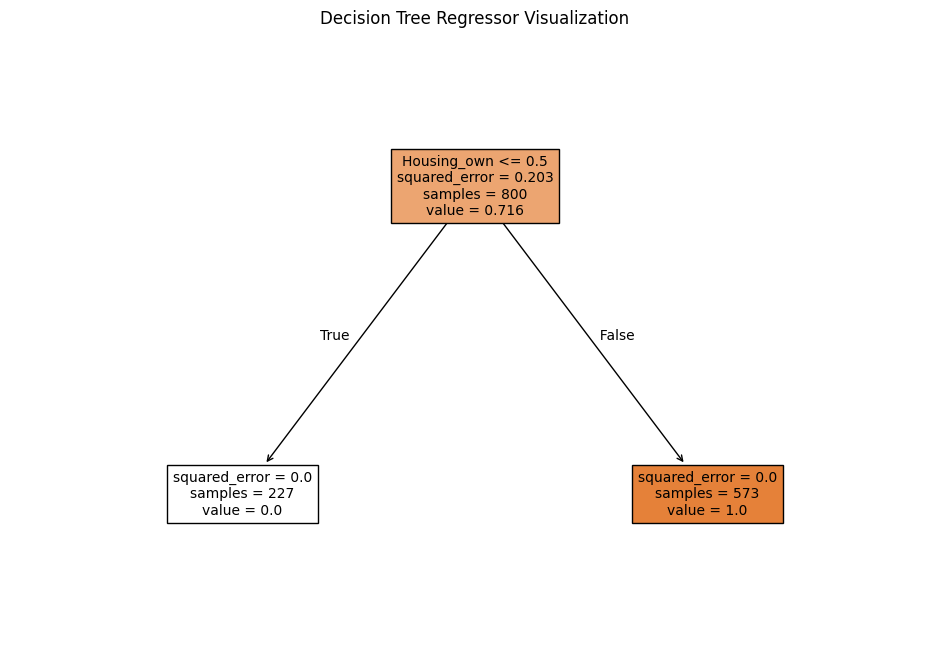

In [210]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree Regressor Visualization")
plt.show()

# **SVR()**